In [1]:
import requests
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
import json
import os
from os import listdir
from os.path import isfile, join

In [21]:
# Where my json files are located
player_name = "Josh"
onlyfiles = [f for f in listdir(f"../{player_name}FaceitData/MatchStats") if isfile(join(f"../{player_name}FaceitData/MatchStats", f))]

In [22]:
#Rename columns
def rename_cols(text: str):
    text = text.split(".")[1]
    text = text.split(" ")
    text = "".join(list(map(str.capitalize, text)))
    return text

In [4]:
def create_df_from_json():
    df = pd.DataFrame()
    for ID in onlyfiles:
        path = f"../{player_name}FaceitData/MatchStats/{ID}"
        #print(path)
        with open(path, "r") as file:
           obj = json.load(file)["items"]
           obj = pd.json_normalize(obj)
        obj = obj.rename(columns=rename_cols)
        df = pd.concat([df, obj], ignore_index=True)
    return df


In [5]:
df_josh = create_df_from_json()

In [23]:
# Create picklle file if there are large amounts of json files
df_josh.to_pickle("JoshStats.pkl", compression="bz2")

In [2]:
df_josh = pd.read_pickle("JoshStats.pkl", compression="bz2")

In [3]:
df_josh

,FinalScore,MatchRound,TripleKills,Score,UpdatedAt,Result,Team,PlayerId,Mvps,Kills,...,Deaths,Map,Headshots,Assists,Nickname,OvertimeScore,DateOrdinal,Year,Month,Date
876,13,1,0,13:16,2016-12-12T20:38:53.701Z,0,team_Kenny_-,838d4924-3056-43d2-bdc2-5b4b7e820cef,0,11,...,20,Overpass,2,4,Bubbles_Myst,0,736310,2016,12,12
875,7,1,1,16:7,2016-12-14T17:04:58.297Z,0,team_G2A_COM_NEO,838d4924-3056-43d2-bdc2-5b4b7e820cef,1,18,...,21,Dust2,2,3,Bubbles_Myst,0,736312,2016,12,14
874,0,1,0,16:0,2016-12-19T20:21:32.305Z,0,-KCRI,838d4924-3056-43d2-bdc2-5b4b7e820cef,0,-4,...,16,Cache,0,0,Bubbles_Myst,0,736317,2016,12,19
873,14,1,0,14:16,2016-12-19T21:28:49.934Z,0,team_Bubbles_Myst,838d4924-3056-43d2-bdc2-5b4b7e820cef,3,17,...,24,Nuke,2,2,Bubbles_Myst,0,736317,2016,12,19
872,0,1,0,0:16,2016-12-20T15:28:55.567Z,0,-KCRI,838d4924-3056-43d2-bdc2-5b4b7e820cef,0,3,...,16,Mirage,1,0,Bubbles_Myst,0,736318,2016,12,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,16,1,1,13:16,2021-12-21T15:58:47.738Z,1,team_ForeignPro,838d4924-3056-43d2-bdc2-5b4b7e820cef,5,30,...,16,Mirage,10,2,-Myst1,0,738145,2021,12,21
3,16,1,0,16:11,2021-12-24T21:24:10.423Z,1,team_K0dieG,838d4924-3056-43d2-bdc2-5b4b7e820cef,4,17,...,14,Overpass,7,0,-Myst1,0,738148,2021,12,24
2,8,1,0,16:8,2021-12-29T17:14:56.204Z,0,team_7emka,838d4924-3056-43d2-bdc2-5b4b7e820cef,0,12,...,20,Mirage,7,4,-Myst1,0,738153,2021,12,29
1,16,1,0,16:13,2021-12-29T18:06:09.014Z,1,team_partizaNNN1,838d4924-3056-43d2-bdc2-5b4b7e820cef,5,20,...,17,Inferno,12,5,-Myst1,0,738153,2021,12,29


In [9]:
#onlyfiles

In [10]:
# Put datatypes into df and cleansed df

type = {
    "PlayerId": str,
    "CreatedAt": "datetime64[ns]",
    "Kills": int,
    "Deaths": int,
    "Assists": int,
    "K/dRatio": float,
    "K/rRatio": float,
    "Headshots": int,
    "Headshots%": int,
    "FirstHalfScore": int,
    "SecondHalfScore": int,
    "TripleKills": int,
    "QuadroKills": int,
    "PentaKills": int,
    "Headshots%": int,
    "Mvps": int,
    "OvertimeScore": int,
    "Rounds": int,
    "Result": int,
}

df_josh = df_josh.astype(type, errors="ignore")
df_josh.dropna(how="any", inplace=True)
df_josh['Score'] = df_josh['Score'].str.replace(" / ", ":")
df_josh = df_josh
#df_jj['Result'] = df_jj["Result"].astype(int).replace({1: "Win", 0: "Loss"})


In [11]:
# Clean CreateAt Column

df_josh['CreatedAt'] = df_josh['CreatedAt'].map(lambda x: x.lstrip('+-').rstrip('Z'))
df_josh= df_josh[df_josh['CreatedAt'].str.len() > 22]


In [12]:

df_josh['CreatedAt'] = df_josh['CreatedAt'].astype("datetime64[ns]")
df_josh["DateOrdinal"] = df_josh['CreatedAt'].apply(lambda x: x.toordinal())


df_josh["Year"] = df_josh['CreatedAt'].dt.year
df_josh["Month"] = df_josh['CreatedAt'].dt.month
df_josh["Date"] = df_josh['CreatedAt'].dt.day

In [13]:

rename_all_maps = {
    "de_mirage": "Mirage",
    "de_inferno": "Inferno",
    "de_train": "Train",
    "de_overpass": "Overpass",
    "de_cache": "Cache",
    "de_nuke": "Nuke",
    "de_vertigo": "Vertigo",
    "de_dust2": "Dust2",
    "de_ancient": "Ancient",
    "de_cbble": "Cobblestone",
    "de_anubis": "Anubis"
}

df_josh = df_josh.replace({"Map": rename_all_maps})
df_josh.sort_values(by="CreatedAt", ascending=True, inplace=True)
df_josh = df_josh.groupby('Map').filter(lambda x: len(x)>2)


In [14]:
df_josh

,FinalScore,MatchRound,TripleKills,Score,UpdatedAt,Result,Team,PlayerId,Mvps,Kills,...,Deaths,Map,Headshots,Assists,Nickname,OvertimeScore,DateOrdinal,Year,Month,Date
876,13,1,0,13:16,2016-12-12T20:38:53.701Z,0,team_Kenny_-,838d4924-3056-43d2-bdc2-5b4b7e820cef,0,11,...,20,Overpass,2,4,Bubbles_Myst,0,736310,2016,12,12
875,7,1,1,16:7,2016-12-14T17:04:58.297Z,0,team_G2A_COM_NEO,838d4924-3056-43d2-bdc2-5b4b7e820cef,1,18,...,21,Dust2,2,3,Bubbles_Myst,0,736312,2016,12,14
874,0,1,0,16:0,2016-12-19T20:21:32.305Z,0,-KCRI,838d4924-3056-43d2-bdc2-5b4b7e820cef,0,-4,...,16,Cache,0,0,Bubbles_Myst,0,736317,2016,12,19
873,14,1,0,14:16,2016-12-19T21:28:49.934Z,0,team_Bubbles_Myst,838d4924-3056-43d2-bdc2-5b4b7e820cef,3,17,...,24,Nuke,2,2,Bubbles_Myst,0,736317,2016,12,19
872,0,1,0,0:16,2016-12-20T15:28:55.567Z,0,-KCRI,838d4924-3056-43d2-bdc2-5b4b7e820cef,0,3,...,16,Mirage,1,0,Bubbles_Myst,0,736318,2016,12,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,16,1,1,13:16,2021-12-21T15:58:47.738Z,1,team_ForeignPro,838d4924-3056-43d2-bdc2-5b4b7e820cef,5,30,...,16,Mirage,10,2,-Myst1,0,738145,2021,12,21
3,16,1,0,16:11,2021-12-24T21:24:10.423Z,1,team_K0dieG,838d4924-3056-43d2-bdc2-5b4b7e820cef,4,17,...,14,Overpass,7,0,-Myst1,0,738148,2021,12,24
2,8,1,0,16:8,2021-12-29T17:14:56.204Z,0,team_7emka,838d4924-3056-43d2-bdc2-5b4b7e820cef,0,12,...,20,Mirage,7,4,-Myst1,0,738153,2021,12,29
1,16,1,0,16:13,2021-12-29T18:06:09.014Z,1,team_partizaNNN1,838d4924-3056-43d2-bdc2-5b4b7e820cef,5,20,...,17,Inferno,12,5,-Myst1,0,738153,2021,12,29


In [15]:
#Displaying JJ stats (My Own)

#Displaying Maps and Other stats

Maps_Stats_df_josh = (
    df_josh.groupby(by="Map").aggregate(
        {
            "Map": 'count',
            "Kills": sum,
            "Assists": sum,
            "Deaths": sum,
            "Mvps": sum,
            "Headshots": 'mean',
            "Headshots%": 'mean',
            "Result": sum
        }
    ).rename(({"Map": "Matches", "Result": "Wins"}), axis = 1)
)


C:\Users\jaceh\AppData\Local\Temp\ipykernel_24052\2226197751.py:6: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df_josh.groupby(by="Map").aggregate(


In [16]:
Maps_Stats_df_josh

,Matches,Kills,Assists,Deaths,Mvps,Headshots,Headshots%,Wins
Map,,,,,,,,
Cache,102,1820,349,1777,237,8.098039,44.627451,58
Cobblestone,5,76,18,95,7,5.000000,39.800000,1
Dust2,121,2193,414,2226,286,8.752066,48.454545,48
Inferno,281,5272,888,5080,731,9.309609,49.679715,136
Mirage,506,9637,1847,9460,1303,9.559289,50.276680,253
Nuke,66,1277,222,1173,173,8.424242,44.439394,28
Overpass,148,2832,568,2734,390,8.601351,45.608108,75
Train,226,4210,792,3987,569,8.663717,46.893805,133
Vertigo,54,1084,190,992,142,10.314815,53.444444,29


In [20]:
Maps_Stats_df_josh["Losses"] = (Maps_Stats_df_josh["Matches"] - Maps_Stats_df_josh["Wins"]).astype(int)
Maps_Stats_df_josh["Winrate%"] = (((Maps_Stats_df_josh["Wins"] / Maps_Stats_df_josh["Matches"]) * 100).round(2)).astype(float)
Maps_Stats_df_josh["Headshots"] = (Maps_Stats_df_josh["Headshots"].apply(lambda x: round(x,2))).astype(float)
Maps_Stats_df_josh["Headshots%"] = (Maps_Stats_df_josh["Headshots%"].apply(lambda x: round(x,2))).astype(float)
Maps_Stats_df_josh["Matches"].astype(int)
Maps_Stats_df_josh.sort_values(by="Matches", ascending=False, inplace=True)

Maps_Stats_df_josh

,Matches,Kills,Assists,Deaths,Mvps,Headshots,Headshots%,Wins,Losses,Winrate%
Map,,,,,,,,,,
Mirage,506,9637,1847,9460,1303,9.56,50.28,253,253,50.00
Inferno,281,5272,888,5080,731,9.31,49.68,136,145,48.40
Train,226,4210,792,3987,569,8.66,46.89,133,93,58.85
Overpass,148,2832,568,2734,390,8.60,45.61,75,73,50.68
Dust2,121,2193,414,2226,286,8.75,48.45,48,73,39.67
Cache,102,1820,349,1777,237,8.10,44.63,58,44,56.86
Nuke,66,1277,222,1173,173,8.42,44.44,28,38,42.42
Vertigo,54,1084,190,992,142,10.31,53.44,29,25,53.70
Cobblestone,5,76,18,95,7,5.00,39.80,1,4,20.00


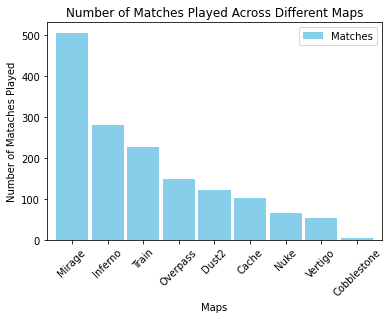

In [19]:

#Number of matches played across different maps
Maps_Stats_df_josh.plot.bar(y = "Matches", color = "skyblue", title = 'Number of Matches Played Across Different Maps', width = 0.9)
plt.xticks(rotation=45)
plt.xlabel('Maps')
plt.ylabel('Number of Mataches Played')


def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i])

plt.show()
